# Thompson Sampling

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
# CTR = click through rate

## Implementing Thompson Sampling

In [3]:
import random

N = 500     # number of rounds (running with all 10000 rounds is no better than just counting
                # The strength of a reinforcement learning algorithm is the ability to see the most productive ad with many fewer rounds
d = 10 # number of ads
ad_selected = [] # will eventually be a list with 10,000 entries

numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d

total_reward = 0 # accumulates all rewards

for n in range(0, N):
        ad = 0 # the index of the ad selected in each round
        max_random = 0 # the maximum number of random draws an ad gets
        for i in range (0, d):
                random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
                if random_beta > max_random:
                        max_random = random_beta
                        ad = i
                # no else needed; it was needed in UCB because of its different math
        ad_selected.append(ad)
        reward = dataset.values[n, ad]
        if reward == 1:
                numbers_of_rewards_1[ad] += 1
        else:
                numbers_of_rewards_0[ad] += 1
        total_reward = total_reward + reward


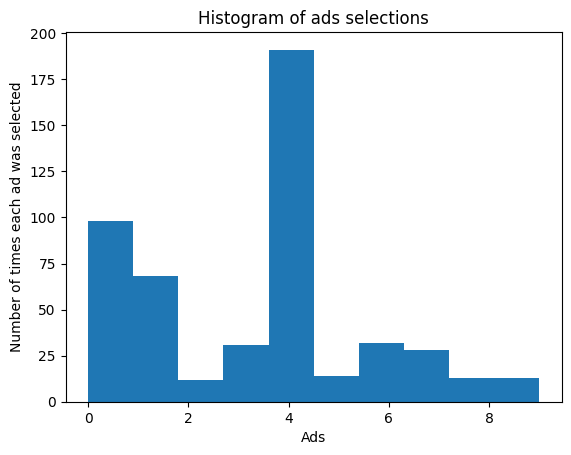

In [4]:
plt.hist(ad_selected) #which ad was selected in each round
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()